## Import all require library

In [1]:
# !pip install -r requirements.txt

In [2]:
!nvidia-smi

Wed Jun 12 10:22:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1050 Ti   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   38C    P3              N/A /  18W |      0MiB /  4096MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import mne
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from utility import *

## Loading single edf file
* After it is loaded, it returns mne.io.Raw EDF instances [To see more method/details](https://mne.tools/stable/generated/mne.io.Raw.html)

In [4]:
filename = f"{EEG_FILE_DIRC}/Export-#1495_2654_2023-11-30_14-36-51.eeg"

raw = Compumedics(filename).export_to_mne_raw() # Return a raw object

Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2654_2023-11-30_14-36-51.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2654_2023-11-30_14-36-51.eeg\export-#1495_2654_2023-11-30_14-36-51.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2654_2023-11-30_14-36-51.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2654_2023-11-30_14-36-51.eeg\eegdata\eegdata.ini
Opening all (1) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz', 'T1', 'T2', 'EOGL', 'EOGR', 'EMG1', 'Fp1', 'F

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:293: RuntimeWarning: Omitted 16 annotation(s) that were outside data range.
  raw.set_annotations(ann)


In [5]:
df = raw.to_data_frame()
df.describe()

,time,EMG2,ECGL,ECGR,HV,C3,C4,P3,P4,O1,...,EMG1,Fp1,Fp2,F3,F4,29,30,31,32,SpO2
count,825776.000000,825776.000000,825776.000000,825776.000000,825776.000000,825776.000000,825776.000000,825776.000000,825776.000000,825776.000000,...,825776.000000,825776.000000,825776.000000,825776.000000,825776.000000,825776.000000,825776.000000,825776.000000,825776.000000,825776.0
mean,1612.841797,-27.650886,-47.727576,-99.647802,-0.000028,8.160458,10.821816,9.176952,-21.306788,45.176865,...,19.454034,-39.812756,-21.478859,3.459706,-3.840251,-0.000014,-0.001126,-0.000080,0.000036,0.0
std,931.176337,86.081415,102.139062,81.175598,0.000070,85.389236,105.944361,92.486034,76.124953,72.999868,...,75.060918,70.409864,75.265862,75.655938,71.830075,0.000083,0.000252,0.000087,0.000081,0.0
min,0.000000,-496.969151,-527.683820,-1137.361047,-0.000236,-316.700578,-1065.995311,-346.250890,-365.175889,-457.803078,...,-638.963364,-811.147736,-238.416658,-364.114763,-200.875395,-0.000237,-0.001596,-0.000338,-0.000172,0.0
25%,806.420898,-47.299840,-92.012095,-122.188183,-0.000035,-10.783053,6.066453,-14.460054,-38.193473,31.174077,...,5.788710,-42.679803,-35.947316,-17.292807,-16.924583,-0.000022,-0.001390,-0.000089,0.000027,0.0
50%,1612.841797,-33.595719,-66.745721,-103.492974,-0.000032,0.688280,21.278543,0.557944,-24.721592,46.231573,...,20.076717,-36.939786,-28.046301,3.633329,-7.583693,-0.000019,-0.001126,-0.000083,0.000030,0.0
75%,2419.262695,-18.424938,-22.494924,-83.920706,-0.000029,13.444403,34.514444,17.063794,-10.833058,60.229977,...,33.813420,-31.755255,-19.637031,26.169168,1.942165,-0.000017,-0.000917,-0.000079,0.000034,0.0
max,3225.683594,1501.815743,1513.534226,1512.557617,0.001520,1503.524720,1505.905064,1523.513230,1516.952063,1508.834539,...,1505.386201,1516.799442,1513.991971,1507.003675,1515.212702,0.001650,0.001664,0.001673,0.001679,0.0


In [6]:
df.columns

Index(['time', 'EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1',
       'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz', 'T1', 'T2',
       'EOGL', 'EOGR', 'EMG1', 'Fp1', 'Fp2', 'F3', 'F4', '29', '30', '31',
       '32', 'SpO2'],
      dtype='object')

In [7]:
df.head(257)

,time,EMG2,ECGL,ECGR,HV,C3,C4,P3,P4,O1,...,EMG1,Fp1,Fp2,F3,F4,29,30,31,32,SpO2
0,0.000000,-109.082968,-128.410451,-174.396278,-0.000104,-84.107814,-45.590314,-94.153089,-102.080732,-36.653717,...,-59.586961,-113.087590,-114.772673,-141.791810,-81.755912,-0.000129,-0.00139,-0.000221,-0.000058,0.0
1,0.003906,-108.578803,-128.087107,-173.426903,-0.000104,-84.429012,-45.314566,-94.525050,-101.895552,-36.699763,...,-58.989714,-112.717265,-114.172006,-141.423880,-81.663427,-0.000129,-0.00139,-0.000220,-0.000057,0.0
2,0.007812,-106.928805,-126.193292,-172.549844,-0.000103,-83.740735,-44.027744,-92.897710,-100.784469,-34.996010,...,-57.795216,-111.235975,-112.832073,-140.734002,-80.183687,-0.000127,-0.00139,-0.000218,-0.000056,0.0
3,0.011719,-106.653810,-125.638995,-171.765103,-0.000102,-81.721781,-43.522206,-91.874812,-99.719684,-34.213204,...,-57.243913,-110.449037,-112.046589,-139.998141,-80.044956,-0.000127,-0.00139,-0.000218,-0.000056,0.0
4,0.015625,-106.378808,-126.193292,-171.718944,-0.000102,-82.088860,-43.797954,-92.665236,-99.951161,-35.134151,...,-58.208698,-111.004520,-112.832073,-140.780001,-80.044956,-0.000127,-0.00139,-0.000219,-0.000056,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0.984375,-108.257969,-127.763778,-173.703869,-0.000104,-83.373649,-45.957979,-94.106588,-101.756668,-36.331385,...,-59.816673,-112.670976,-113.940987,-142.297722,-81.894643,-0.000127,-0.00139,-0.000220,-0.000057,0.0
253,0.988281,-106.653810,-127.117106,-172.365195,-0.000103,-81.538237,-44.441367,-92.665236,-100.784469,-34.213204,...,-58.254638,-111.235975,-113.294118,-141.055949,-80.368649,-0.000125,-0.00139,-0.000217,-0.000056,0.0
254,0.992188,-105.874642,-125.315666,-172.365195,-0.000102,-81.308812,-43.889871,-92.339767,-99.256729,-34.351349,...,-57.427682,-111.143396,-111.907975,-140.044140,-79.536294,-0.000125,-0.00139,-0.000217,-0.000056,0.0
255,0.996094,-106.607971,-126.100917,-172.596003,-0.000102,-81.079386,-43.476248,-92.246781,-100.043748,-33.936922,...,-57.978985,-111.374844,-113.340320,-140.825985,-79.536294,-0.000125,-0.00139,-0.000218,-0.000056,0.0


In [8]:
raw

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,22 points
Good channels,"2 EMG, 2 ECG, 8 misc, 19 EEG, 2 EOG"
Bad channels,None
EOG channels,"EOGL, EOGR"
ECG channels,"ECGL, ECGR"
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


In [9]:
info = raw.info
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: EMG2, ECGL, ECGR, HV, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, ...
 chs: 2 EMG, 2 ECG, 8 misc, 19 EEG, 2 EOG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 33
 projs: []
 sfreq: 256.0 Hz
>


In [10]:
print("We have a total of ", len(info.keys()), "keys, which are:")
print(info.keys())  

We have a total of  36 keys, which are:
dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])


In [11]:
# Print out everythings in the key
list_None = []
list_nothing = []
for key in info.keys():
    if info[key] == None:
        list_None.append(key)
    elif info[key] == []:
        list_nothing.append(key)
    else:
        if key != "subject_info":
            print(f"For key {key} we have:")
            print(info[key])
            print("------------------------------------------------\n")

For key dig we have:
[<DigPoint |        LPA : (-82.5, -0.0, 0.0) mm     : head frame>, <DigPoint |     Nasion : (0.0, 114.0, 0.0) mm      : head frame>, <DigPoint |        RPA : (82.5, 0.0, -0.0) mm      : head frame>, <DigPoint |     EEG #1 : (-30.9, 114.6, 27.9) mm   : head frame>, <DigPoint |     EEG #3 : (28.4, 115.3, 27.7) mm    : head frame>, <DigPoint |    EEG #16 : (-71.9, 73.1, 25.8) mm    : head frame>, <DigPoint |    EEG #18 : (-51.8, 86.7, 78.7) mm    : head frame>, <DigPoint |    EEG #20 : (-1.2, 93.3, 102.6) mm    : head frame>, <DigPoint |    EEG #22 : (50.3, 87.4, 77.3) mm     : head frame>, <DigPoint |    EEG #24 : (71.4, 74.5, 25.1) mm     : head frame>, <DigPoint |    EEG #40 : (-67.1, 23.4, 104.5) mm   : head frame>, <DigPoint |    EEG #42 : (-1.4, 27.6, 140.2) mm    : head frame>, <DigPoint |    EEG #44 : (65.3, 23.6, 103.7) mm    : head frame>, <DigPoint |    EEG #62 : (-55.0, -44.2, 99.9) mm   : head frame>, <DigPoint |    EEG #64 : (-1.7, -45.2, 126.7) mm   : h

In [12]:
print("For each key in list below, we have 'None'\n",list_None,"\n")
print("For each key in list below, we have '[]'  \n",list_nothing,"\n")
print("Total number of useless key:", len(list_None) + len(list_nothing))
print("Total number of useful  key:", len(info.keys()) - len(list_None) - len(list_nothing))

For each key in list below, we have 'None'
 ['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle'] 

For each key in list below, we have '[]'  
 ['bads', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history'] 

Total number of useless key: 27
Total number of useful  key: 9


In [13]:
print("The edf file is annotated?", len(raw.annotations) != 0)
print(raw.annotations)

The edf file is annotated? True
<Annotations | 182 segments: 0 (3), 0.50 (7), 10 (3), 10 s/page (1), 10-20 ...>


<a id = "T2"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
## Useful Keys in edf files

|No|Key|Description|
|:-:|:--|:--|
|1|highpass|Highpass corner frequency in Hertz. Zero indicates a DC recording|
|2|lowpass|Lowpass corner frequency in Hertz. It is automatically set to half the sampling rate if there is otherwise no low-pass applied to the data.|
|3|__chs__|list of dict about all the channel (details at below) __Main data__|
|4|custom_ref_applied|Whether a custom (=other than average) reference has been applied to the EEG data. This flag is checked by some algorithms that require an average reference to be set.|
|5|sfreq| sampling frequency in Hertz.|
|6|dev_head_t|The device to head transformation.|
|7|ch_names|Channel Name|
|8|nchan|Number of channel|
|9|subject_info|Name of the patient|

* Description is obtained from [mne.info](https://mne.tools/stable/generated/mne.Info.html#mne.Info)

## Visualize properties for each eeg files

In [14]:
list_info     = []
num_data_list = []
list_directory= []
list_snore    = []
list_num_col  = []
list_col      = []

for filename in os.listdir(EEG_FILE_DIRC):
    if filename.endswith(".eeg"):
        edf_filename = f"{EEG_FILE_DIRC}/" + filename
        raw = Compumedics(edf_filename).export_to_mne_raw()  # Return a raw object
        
        columns = [col.lower() for col in raw.ch_names]
        list_snore.append("snore" in columns)
        list_num_col.append(len(columns))
        list_col.append(columns)
        
        list_directory.append(edf_filename)
        list_info.append(raw.info)
        num_data_list.append(raw.n_times)
        
        del raw

Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2654_2023-11-30_14-36-51.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2654_2023-11-30_14-36-51.eeg\export-#1495_2654_2023-11-30_14-36-51.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2654_2023-11-30_14-36-51.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2654_2023-11-30_14-36-51.eeg\eegdata\eegdata.ini
Opening all (1) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz', 'T1', 'T2', 'EOGL', 'EOGR', 'EMG1', 'Fp1', 'F

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:294: RuntimeWarning: Omitted 16 annotation(s) that were outside data range.
  raw.set_annotations(ann)


Raw: <RawArray | 33 x 825776 (3225.7 s), ~207.9 MB, data loaded>
Conversion complete
Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2656_2023-11-29_10-12-39.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2656_2023-11-29_10-12-39.eeg\export-#1495_2656_2023-11-29_10-12-39.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2656_2023-11-29_10-12-39.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2656_2023-11-29_10-12-39.eeg\eegdata\eegdata.ini
Opening all (1) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:294: RuntimeWarning: Omitted 130 annotation(s) that were outside data range.
  raw.set_annotations(ann)


Raw: <RawArray | 33 x 823328 (3216.1 s), ~207.3 MB, data loaded>
Conversion complete
Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2657_2023-11-09_14-08-53.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2657_2023-11-09_14-08-53.eeg\export-#1495_2657_2023-11-09_14-08-53.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2657_2023-11-09_14-08-53.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2657_2023-11-09_14-08-53.eeg\eegdata\eegdata.ini
Opening all (1) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:294: RuntimeWarning: Omitted 34 annotation(s) that were outside data range.
  raw.set_annotations(ann)


Raw: <RawArray | 33 x 786480 (3072.2 s), ~198.0 MB, data loaded>
Conversion complete
Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2658_2022-10-21_14-23-50.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2658_2022-10-21_14-23-50.eeg\export-#1495_2658_2022-10-21_14-23-50.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2658_2022-10-21_14-23-50.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2658_2022-10-21_14-23-50.eeg\eegdata\eegdata.ini
Opening all (1) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:294: RuntimeWarning: Omitted 44 annotation(s) that were outside data range.
  raw.set_annotations(ann)


Raw: <RawArray | 33 x 877728 (3428.6 s), ~221.0 MB, data loaded>
Conversion complete
Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2659_2023-11-28_14-02-43.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2659_2023-11-28_14-02-43.eeg\export-#1495_2659_2023-11-28_14-02-43.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2659_2023-11-28_14-02-43.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2659_2023-11-28_14-02-43.eeg\eegdata\eegdata.ini
Opening all (1) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:294: RuntimeWarning: Omitted 91 annotation(s) that were outside data range.
  raw.set_annotations(ann)


Raw: <RawArray | 33 x 764784 (2987.4 s), ~192.6 MB, data loaded>
Conversion complete
Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2660_2023-11-15_10-07-03.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2660_2023-11-15_10-07-03.eeg\export-#1495_2660_2023-11-15_10-07-03.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2660_2023-11-15_10-07-03.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2660_2023-11-15_10-07-03.eeg\eegdata\eegdata.ini
Opening all (2) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:294: RuntimeWarning: Omitted 87 annotation(s) that were outside data range.
  raw.set_annotations(ann)


Raw: <RawArray | 33 x 1065104 (4160.6 s), ~268.2 MB, data loaded>
Conversion complete
Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2663_2023-11-29_13-45-07.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2663_2023-11-29_13-45-07.eeg\export-#1495_2663_2023-11-29_13-45-07.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2663_2023-11-29_13-45-07.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2663_2023-11-29_13-45-07.eeg\eegdata\eegdata.ini
Opening all (1) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', '

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:294: RuntimeWarning: Omitted 138 annotation(s) that were outside data range.
  raw.set_annotations(ann)


Raw: <RawArray | 33 x 759216 (2965.7 s), ~191.2 MB, data loaded>
Conversion complete
Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2667_2022-04-12_14-31-14.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2667_2022-04-12_14-31-14.eeg\export-#1495_2667_2022-04-12_14-31-14.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2667_2022-04-12_14-31-14.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2667_2022-04-12_14-31-14.eeg\eegdata\eegdata.ini
Opening all (1) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:294: RuntimeWarning: Omitted 112 annotation(s) that were outside data range.
  raw.set_annotations(ann)


Raw: <RawArray | 33 x 987584 (3857.7 s), ~248.7 MB, data loaded>
Conversion complete
Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2669_2023-11-27_11-39-39.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2669_2023-11-27_11-39-39.eeg\export-#1495_2669_2023-11-27_11-39-39.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2669_2023-11-27_11-39-39.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1495_2669_2023-11-27_11-39-39.eeg\eegdata\eegdata.ini
Opening all (2) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:294: RuntimeWarning: Omitted 34 annotation(s) that were outside data range.
  raw.set_annotations(ann)


Raw: <RawArray | 33 x 1871200 (7309.4 s), ~471.1 MB, data loaded>
Conversion complete
Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1496_2670_2023-11-29_15-45-36.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1496_2670_2023-11-29_15-45-36.eeg\export-#1496_2670_2023-11-29_15-45-36.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1496_2670_2023-11-29_15-45-36.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1496_2670_2023-11-29_15-45-36.eeg\eegdata\eegdata.ini
Opening all (1) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', '

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:294: RuntimeWarning: Omitted 339 annotation(s) that were outside data range.
  raw.set_annotations(ann)


Raw: <RawArray | 33 x 5644720 (22049.7 s), ~1.39 GB, data loaded>
Conversion complete
Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1496_2675_2023-11-10_10-04-47.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1496_2675_2023-11-10_10-04-47.eeg\export-#1496_2675_2023-11-10_10-04-47.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1496_2675_2023-11-10_10-04-47.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1496_2675_2023-11-10_10-04-47.eeg\eegdata\eegdata.ini
Opening all (1) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', '

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:294: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw.set_annotations(ann)


Raw: <RawArray | 33 x 979056 (3824.4 s), ~246.5 MB, data loaded>
Conversion complete
Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1496_2677_2023-11-22_08-09-49.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1496_2677_2023-11-22_08-09-49.eeg\export-#1496_2677_2023-11-22_08-09-49.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1496_2677_2023-11-22_08-09-49.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1496_2677_2023-11-22_08-09-49.eeg\eegdata\eegdata.ini
Opening all (2) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:294: RuntimeWarning: Omitted 2 annotation(s) that were outside data range.
  raw.set_annotations(ann)


Raw: <RawArray | 33 x 2747472 (10732.3 s), ~691.8 MB, data loaded>
Conversion complete
Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1497_2679_2023-11-30_14-36-45.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1497_2679_2023-11-30_14-36-45.eeg\export-#1497_2679_2023-11-30_14-36-45.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1497_2679_2023-11-30_14-36-45.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1497_2679_2023-11-30_14-36-45.eeg\eegdata\eegdata.ini
Opening all (1) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:294: RuntimeWarning: Omitted 6 annotation(s) that were outside data range.
  raw.set_annotations(ann)


Raw: <RawArray | 33 x 2688320 (10501.2 s), ~676.9 MB, data loaded>
Conversion complete
Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1497_2681_2023-09-11_09-59-42.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1497_2681_2023-09-11_09-59-42.eeg\export-#1497_2681_2023-09-11_09-59-42.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1497_2681_2023-09-11_09-59-42.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1497_2681_2023-09-11_09-59-42.eeg\eegdata\eegdata.ini
Opening all (4) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:294: RuntimeWarning: Omitted 24 annotation(s) that were outside data range.
  raw.set_annotations(ann)


Raw: <RawArray | 33 x 4689328 (18317.7 s), ~1.15 GB, data loaded>
Conversion complete
Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1497_2682_2023-11-22_00-32-49.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1497_2682_2023-11-22_00-32-49.eeg\export-#1497_2682_2023-11-22_00-32-49.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1497_2682_2023-11-22_00-32-49.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1497_2682_2023-11-22_00-32-49.eeg\eegdata\eegdata.ini
Opening all (5) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', '

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:294: RuntimeWarning: Omitted 126 annotation(s) that were outside data range.
  raw.set_annotations(ann)


In [15]:
information_list = []
key_to_extract   = ["sfreq", "highpass", "lowpass"]
for i, info in enumerate(list_info):
    information_list.append([info[key] for key in key_to_extract])


In [16]:
df_temp = pd.DataFrame(information_list, columns=key_to_extract)

# Insert File Directory, Number of rows of data in each eeg file, Duration of the EEG file recording (in seconds)
df_temp.insert(0, "File Directory", list_directory, True)
df_temp.insert(len(key_to_extract), "Num data", num_data_list, True)
df_temp.insert(len(key_to_extract), "Duration (s)", [i/j for i,j in zip(num_data_list, df_temp["sfreq"])] , True)
df_temp.insert(len(key_to_extract), "Sleep Study?", list_snore , True)
df_temp.insert(len(key_to_extract), "Num channel", list_num_col , True)

df_temp

,File Directory,sfreq,highpass,Num channel,Sleep Study?,Duration (s),Num data,lowpass
0,EEG_Dataset/Export-#1495_2654_2023-11-30_14-36...,256.0,0.0,33,False,3225.6875,825776,128.0
1,EEG_Dataset/Export-#1495_2656_2023-11-29_10-12...,256.0,0.0,33,False,3216.1250,823328,128.0
2,EEG_Dataset/Export-#1495_2657_2023-11-09_14-08...,256.0,0.0,33,False,3072.1875,786480,128.0
3,EEG_Dataset/Export-#1495_2658_2022-10-21_14-23...,256.0,0.0,33,False,3428.6250,877728,128.0
4,EEG_Dataset/Export-#1495_2659_2023-11-28_14-02...,256.0,0.0,33,False,2987.4375,764784,128.0
5,EEG_Dataset/Export-#1495_2660_2023-11-15_10-07...,256.0,0.0,33,False,4160.5625,1065104,128.0
6,EEG_Dataset/Export-#1495_2663_2023-11-29_13-45...,256.0,0.0,33,False,2965.6875,759216,128.0
7,EEG_Dataset/Export-#1495_2667_2022-04-12_14-31...,256.0,0.0,33,False,3857.7500,987584,128.0
8,EEG_Dataset/Export-#1495_2669_2023-11-27_11-39...,256.0,0.0,33,False,7309.3750,1871200,128.0
9,EEG_Dataset/Export-#1496_2670_2023-11-29_15-45...,256.0,0.0,33,False,2203.9375,564208,128.0


## Test effect of convert mne to df and convert back

In [24]:
filename = f"{EEG_FILE_DIRC}/Export-#1497_2681_2023-09-11_09-59-42.eeg"

raw = Compumedics(filename).export_to_mne_raw() # Return a raw object

ORIGINAL_FREQUENCY = raw.info["sfreq"] # Get the sampling frequency

df_original        = raw.to_data_frame() / 1e6 
raw.info

Start to import c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1497_2681_2023-09-11_09-59-42.eeg
Checking necessary files...
Found .sdy at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1497_2681_2023-09-11_09-59-42.eeg\export-#1497_2681_2023-09-11_09-59-42.sdy
Checking the content of c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1497_2681_2023-09-11_09-59-42.eeg\eegdata
Found EEG header at c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\Export-#1497_2681_2023-09-11_09-59-42.eeg\eegdata\eegdata.ini
Opening all (4) .rda file(s)
Checking optional files...
Checking electrode placement file...
Checking event database...
Event database ok
Reading Compumedics header (.sdy) file
Compumedics header loaded
33 channel(s): ['EMG2', 'ECGL', 'ECGR', 'HV', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz', 'T1', 'T2', 'EOGL', 'EOGR', 'EMG1', 'Fp1', 'F

c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\ummc_db_util.py:294: RuntimeWarning: Omitted 24 annotation(s) that were outside data range.
  raw.set_annotations(ann)


Raw: <RawArray | 33 x 4689328 (18317.7 s), ~1.15 GB, data loaded>
Conversion complete


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,22 points
Good channels,"2 EMG, 2 ECG, 8 misc, 19 EEG, 2 EOG"
Bad channels,None
EOG channels,"EOGL, EOGR"
ECG channels,"ECGL, ECGR"
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


In [25]:
df_original = df_original.loc[:,CHANNELS_NAME]
print(df_original.shape)
df_original.describe()

(4689328, 19)


,F7,T3,T5,Fp1,F3,C3,P3,O1,Fz,Cz,Pz,O2,P4,C4,F4,Fp2,T6,T4,F8
count,4.689328e+06,4.689328e+06,4.689328e+06,4.689328e+06,4.689328e+06,4.689328e+06,4.689328e+06,4.689328e+06,4.689328e+06,4.689328e+06,4.689328e+06,4.689328e+06,4.689328e+06,4.689328e+06,4.689328e+06,4.689328e+06,4.689328e+06,4.689328e+06,4.689328e+06
mean,-3.450562e-05,-4.833472e-06,-5.589286e-06,-1.258377e-05,2.007439e-05,-1.102747e-06,-1.378012e-05,4.511339e-06,-1.644694e-05,9.888259e-06,-1.220872e-06,1.320326e-05,-6.706611e-06,-3.146175e-06,6.166779e-06,-1.460182e-07,2.976698e-05,7.787618e-06,3.400379e-07
std,1.688235e-04,1.163678e-04,1.344424e-04,4.422209e-05,1.758564e-04,1.573003e-04,1.458407e-04,9.014095e-05,6.213832e-05,6.900955e-05,7.313346e-05,7.205879e-05,7.094153e-05,6.925578e-05,6.099171e-05,4.588829e-05,7.066047e-05,7.453124e-05,6.655848e-05
min,-1.486633e-03,-1.498383e-03,-1.492432e-03,-1.310748e-03,-1.471680e-03,-1.492828e-03,-1.486511e-03,-1.478760e-03,-1.325822e-03,-1.318064e-03,-1.312722e-03,-1.325744e-03,-1.314393e-03,-1.321820e-03,-1.310376e-03,-1.329717e-03,-1.315112e-03,-1.324949e-03,-1.323713e-03
25%,-5.312645e-05,-2.414386e-05,-2.591533e-05,-2.236740e-05,3.278584e-06,-1.913415e-05,-3.284406e-05,-1.638153e-05,-3.133009e-05,-7.138344e-06,-1.794000e-05,-4.952572e-06,-2.360080e-05,-1.818645e-05,-8.715668e-06,-1.250317e-05,1.092527e-05,-9.666852e-06,-1.457224e-05
50%,-3.692992e-05,-3.429526e-06,-7.241719e-06,-1.352867e-05,1.836905e-05,-2.460106e-06,-1.465281e-05,5.505637e-06,-1.641533e-05,9.442493e-06,-1.393834e-06,1.272220e-05,-6.260518e-06,-3.483475e-06,7.857649e-06,-1.323328e-06,2.896782e-05,8.668398e-06,3.177747e-07
75%,-2.032507e-05,1.577582e-05,1.220617e-05,-3.607646e-06,3.372899e-05,1.430506e-05,3.856002e-06,2.576818e-05,-1.909817e-06,2.710764e-05,1.578180e-05,3.139658e-05,1.189048e-05,1.239574e-05,2.235366e-05,9.993411e-06,4.886904e-05,2.700365e-05,1.570715e-05
max,1.486588e-03,1.498337e-03,1.492386e-03,1.477647e-03,1.471635e-03,1.492783e-03,1.486466e-03,1.478715e-03,1.489975e-03,1.480393e-03,1.473283e-03,1.488816e-03,1.475816e-03,1.482377e-03,1.479722e-03,1.495224e-03,1.485428e-03,1.487107e-03,1.487504e-03


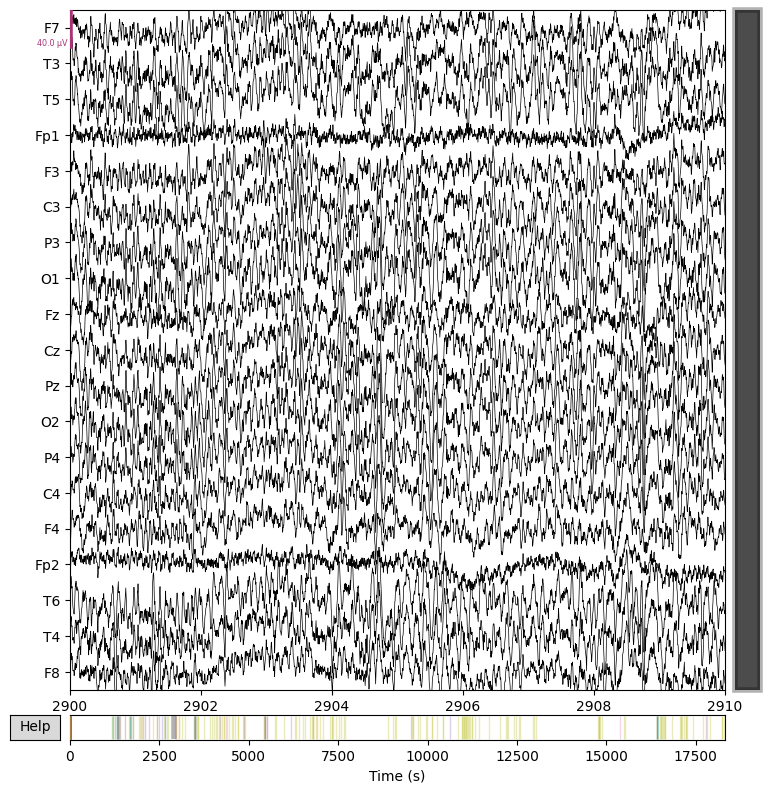

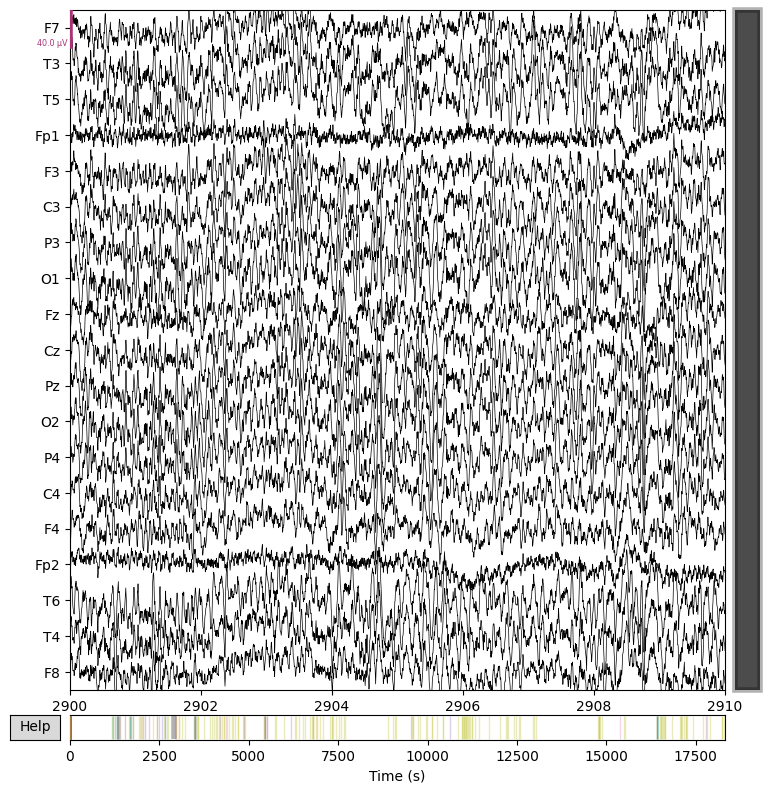

In [26]:
chan_idxs = [raw.ch_names.index(ch) for ch in CHANNELS_NAME]
raw.plot(duration=10, start=2900, order=chan_idxs)

In [27]:
info = mne.create_info(CHANNELS_NAME, ch_types=['eeg'] * len(CHANNELS_NAME), sfreq=ORIGINAL_FREQUENCY)
raw = mne.io.RawArray(df_original.T, info)   
raw.info

Creating RawArray with float64 data, n_channels=19, n_times=4689328
    Range : 0 ... 4689327 =      0.000 ... 18317.684 secs
Ready.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


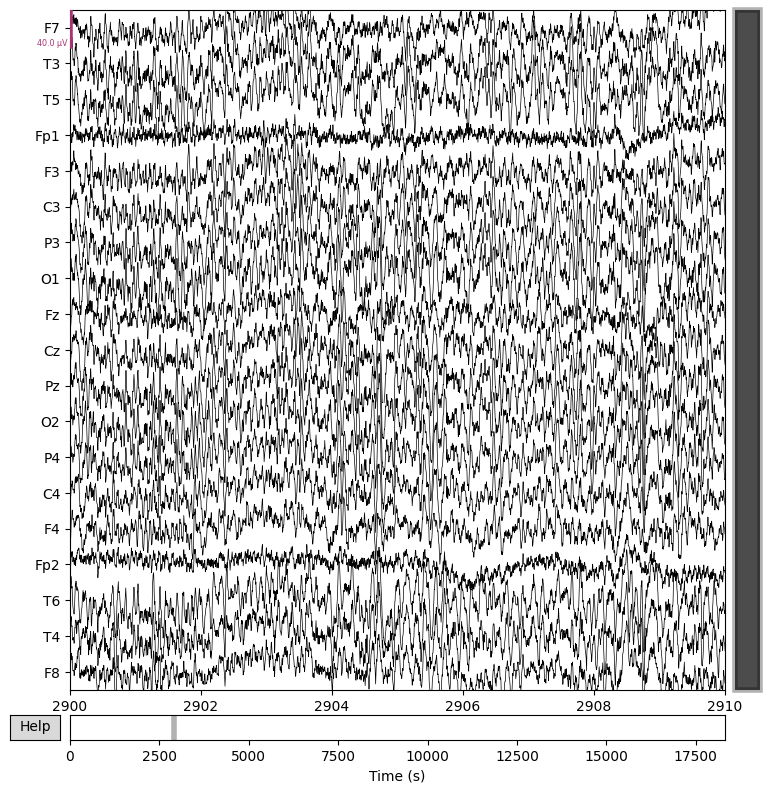

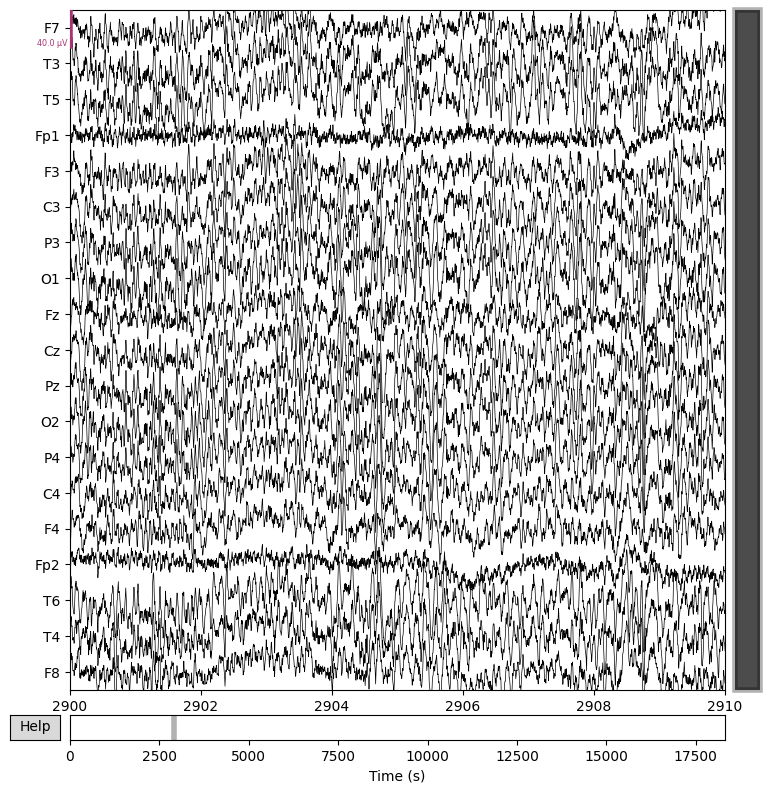

In [28]:
raw.plot(duration=10, start=2900)

### Same plot using matplotlib

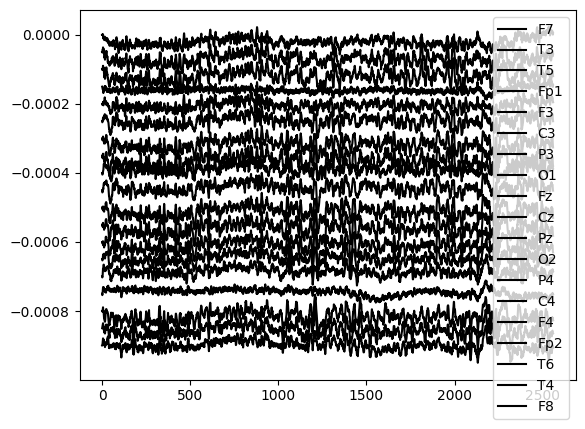

In [29]:
START_INDEX = int((2900)*ORIGINAL_FREQUENCY)
END_INDEX   = int((2910)*ORIGINAL_FREQUENCY)


if type(df_original) != np.ndarray:
    df_original = df_original.to_numpy()
seperate=5e-5
for i, col in enumerate(CHANNELS_NAME):
    plt.plot(df_original[START_INDEX:END_INDEX,i] - df_original[START_INDEX,i] -seperate*i, label=col, color="k")
    # axs[0].set_yticks([])
    plt.legend()

plt.show()